**Merging**

In [1]:
import pandas as pd

# Read the CSV files

df1 = pd.read_csv('ProductA.csv')
df2 = pd.read_csv('ProductA_fb_impressions.csv')
df3 = pd.read_csv('ProductA_google_clicks.csv')

merged_df = df1.merge(df2,how="left", on='Day Index').merge(df3,how='left', on='Day Index')

cleaned_df = merged_df.dropna()

cleaned_df.to_csv('merged_file.csv', index=False)

print(cleaned_df)

     Day Index  Quantity  Impressions  Clicks
0    12/1/2021        14          620     445
1    12/2/2021        10          890     433
2    12/3/2021        13          851     424
3    12/4/2021        22          881     427
4    12/5/2021        33          678     451
..         ...       ...          ...     ...
207  6/26/2022        13         1218     114
208  6/27/2022        16         1311     106
209  6/28/2022        13          885     109
210  6/29/2022        16         1000      60
211  6/30/2022         8          875      65

[212 rows x 4 columns]


In [2]:
import pandas as pd

# Load the uploaded CSV file

data = pd.read_csv('merged_file.csv')

# Find missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


In [4]:
import numpy as np

def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        mean = np.mean(data[col])
        std = np.std(data[col])
        z_scores = [(x - mean) / std for x in data[col]]
        outliers[col] = np.where(np.abs(z_scores) > threshold)
    return outliers

outliers_zscore = detect_outliers_zscore(data)
print(outliers_zscore)


{'Quantity': (array([  9,  78, 142]),), 'Impressions': (array([], dtype=int64),), 'Clicks': (array([], dtype=int64),)}


**2.Outliers**


In [6]:
import pandas as pd

# Load your CSV file

data= pd.read_csv('merged_file.csv')

# Define a function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply the function to each column of interest
for column in ['Quantity', 'Impressions', 'Clicks']:
    outliers = detect_outliers(data, column)
    print(f"Outliers in {column}:\n", outliers)


Outliers in Quantity:
       Day Index  Quantity  Impressions  Clicks
4     12/5/2021        33          678     451
9    12/10/2021        38         1129     391
78    2/17/2022        38         2351     505
113   3/24/2022        32         1321     547
142   4/22/2022        36         1163     470
Outliers in Impressions:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []
Outliers in Clicks:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


**Replacing outliers with median**

In [7]:
import pandas as pd
import numpy as np

# Load your dataset

data= pd.read_csv('merged_file.csv')

# Function to replace outliers with median
def replace_outliers(data, threshold=3):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        mean = data[col].mean()
        std = data[col].std()
        outliers = (data[col] - mean).abs() > threshold * std
        median = data[col].median()
        data.loc[outliers, col] = median
    return data

# Replace outliers in the dataset
data_cleaned = replace_outliers(data)

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_file.csv', index=False)

print("Outliers replaced and cleaned data saved to 'cleaned_file.csv'.")


Outliers replaced and cleaned data saved to 'cleaned_file.csv'.


**3. Feature engineering**

In [8]:
import pandas as pd

# Load your dataset

data= pd.read_csv('merged_file.csv')

# Display the first few rows of the dataframe
print("Original Data:")
print(data.head())

# Example feature engineering steps

# 1. Create new features from existing ones
# Adding a new column for the day of the week from 'Day Index' if it's a date
data['Day Index'] = pd.to_datetime(data['Day Index'])
data['Day of Week'] = data['Day Index'].dt.day_name()

# 2. Create interaction features
data['Clicks per Impression'] = data['Clicks'] / data['Impressions']

# 3. Create polynomial features (squared, cubed, etc.)
data['Quantity Squared'] = data['Quantity'] ** 2

# Display the modified dataframe
print("Data after Feature Engineering:")
print(data.head())

# Save the modified dataset to a new CSV file
data.to_csv('enhanced_file.csv', index=False)

print("Feature engineering completed and saved to 'enhanced_file.csv'.")


Original Data:
   Day Index  Quantity  Impressions  Clicks
0  12/1/2021        14          620     445
1  12/2/2021        10          890     433
2  12/3/2021        13          851     424
3  12/4/2021        22          881     427
4  12/5/2021        33          678     451
Data after Feature Engineering:
   Day Index  Quantity  Impressions  Clicks Day of Week  \
0 2021-12-01        14          620     445   Wednesday   
1 2021-12-02        10          890     433    Thursday   
2 2021-12-03        13          851     424      Friday   
3 2021-12-04        22          881     427    Saturday   
4 2021-12-05        33          678     451      Sunday   

   Clicks per Impression  Quantity Squared  
0               0.717742               196  
1               0.486517               100  
2               0.498237               169  
3               0.484677               484  
4               0.665192              1089  
Feature engineering completed and saved to 'enhanced_file.csv'.


In [ ]:
import pandas as pd

# Load the data
data= pd.read_csv('enhanced_file.csv')


# Display the first few rows of the dataset
data.head()

,Day Index,Quantity,Impressions,Clicks,Day of Week,Clicks per Impression,Quantity Squared
0,2021-12-01,14,620,445,Wednesday,0.717742,196
1,2021-12-02,10,890,433,Thursday,0.486517,100
2,2021-12-03,13,851,424,Friday,0.498237,169
3,2021-12-04,22,881,427,Saturday,0.484677,484
4,2021-12-05,33,678,451,Sunday,0.665192,1089


4. **Visualization**


**Time series for quantity,clicks,impressions**

First few rows of the dataset:
    Day Index  Quantity  Impressions  Clicks Day of Week  \
0  2021-12-01        14          620     445   Wednesday   
1  2021-12-02        10          890     433    Thursday   
2  2021-12-03        13          851     424      Friday   
3  2021-12-04        22          881     427    Saturday   
4  2021-12-05        33          678     451      Sunday   

   Clicks per Impression  Quantity Squared  
0               0.717742               196  
1               0.486517               100  
2               0.498237               169  
3               0.484677               484  
4               0.665192              1089  

Basic statistics of the dataset:
         Quantity  Impressions     Clicks  Clicks per Impression  \
count  212.000000   212.000000  212.00000             212.000000   
mean    17.542453  1531.702830  358.20283               0.255765   
std      5.790423   440.660783  164.52160               0.147023   
min      5.000000   620.000000  

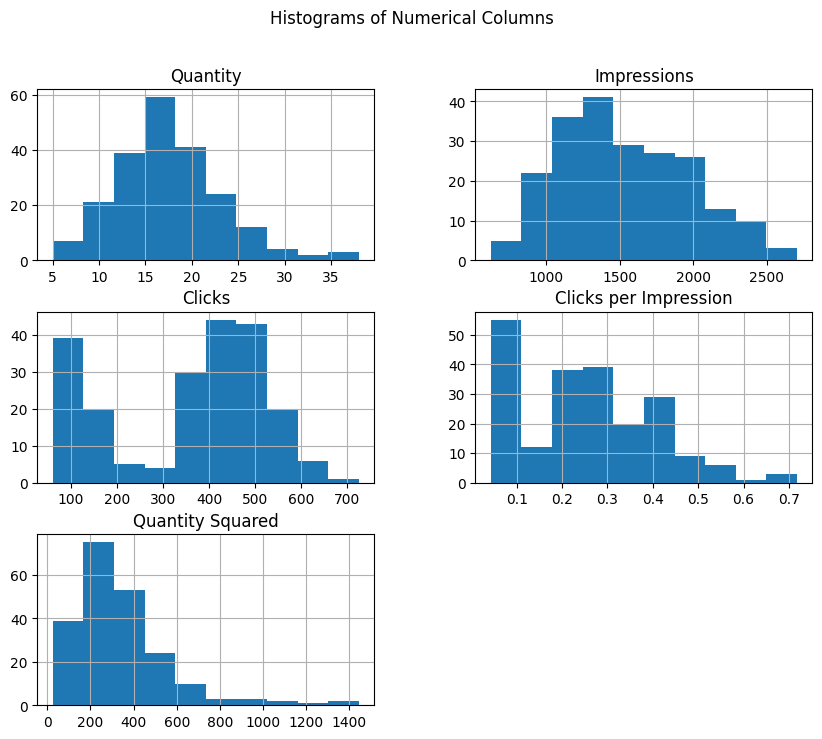

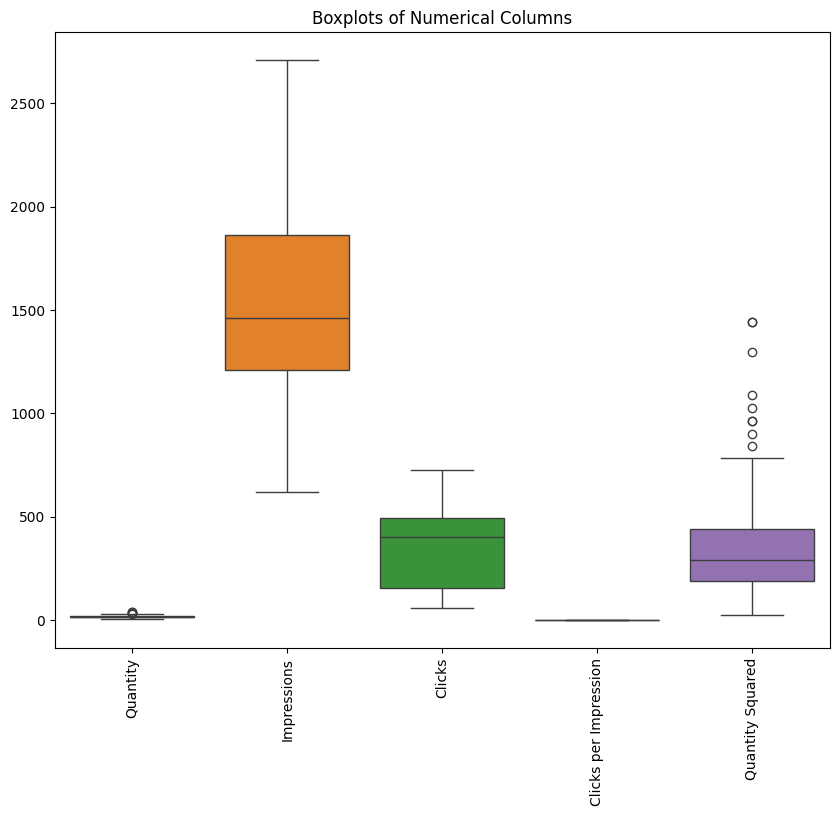


Pairplot to visualize relationships between columns:


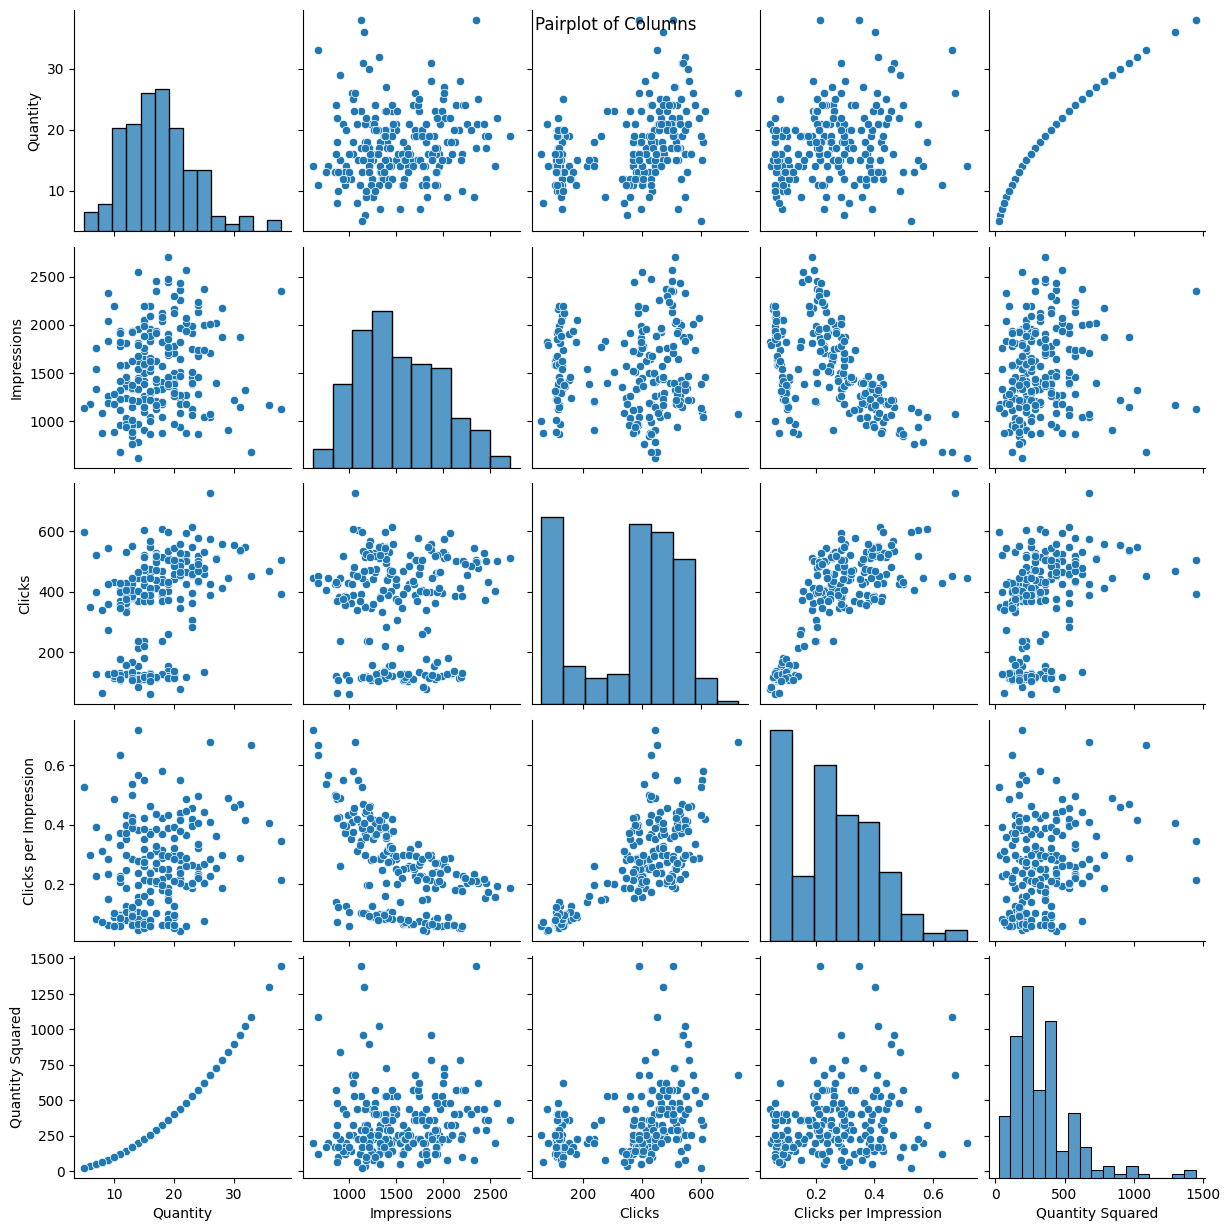

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

df = pd.read_csv('enhanced_file.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Visualize data distributions
print("\nData distribution plots:")
# Histograms for numerical columns
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Boxplots of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

# Pairplot to visualize relationships
print("\nPairplot to visualize relationships between columns:")
sns.pairplot(df)
plt.suptitle('Pairplot of Columns')
plt.show()

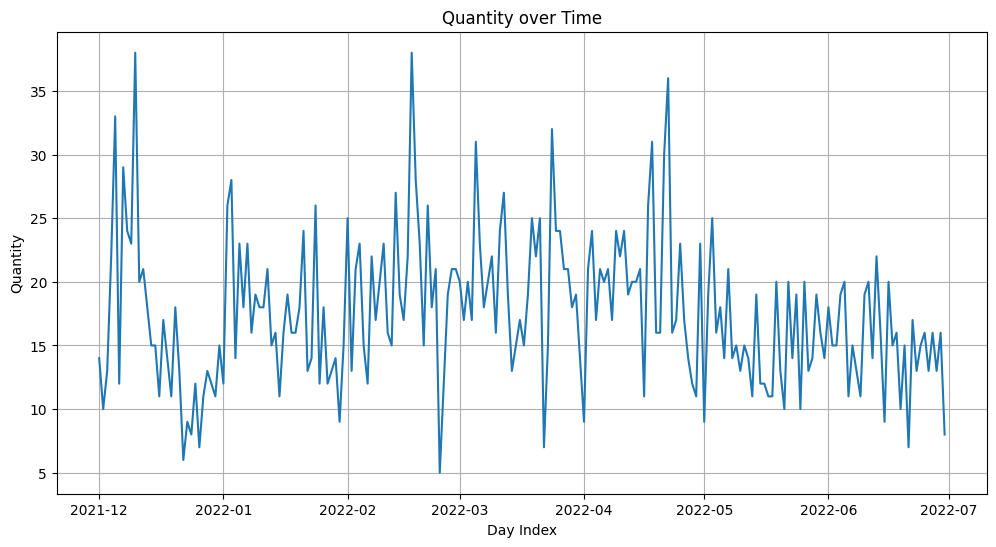

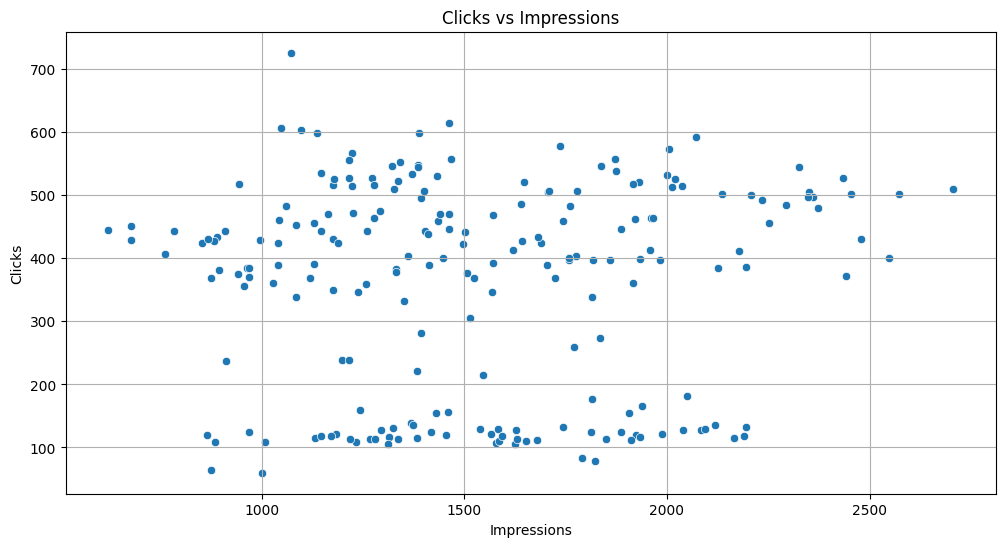

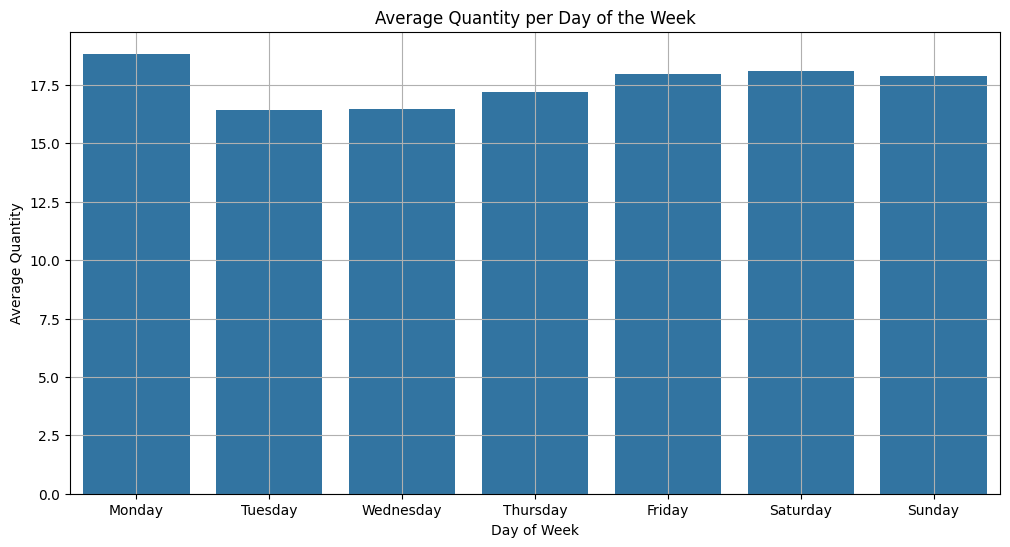

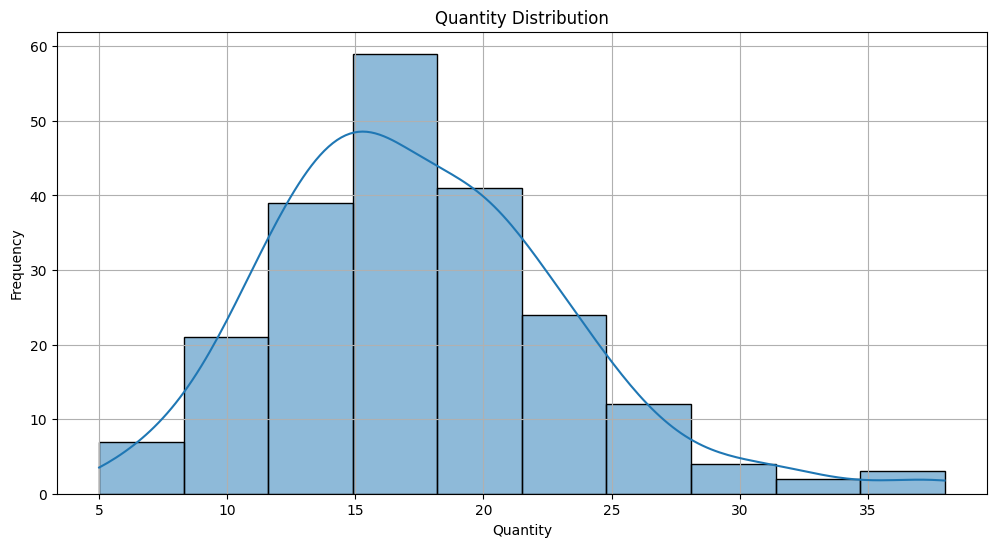

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Line Plot for Quantity over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day Index', y='Quantity')
plt.title('Quantity over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

# Scatter Plot for Clicks vs Impressions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Impressions', y='Clicks')
plt.title('Clicks vs Impressions')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.grid(True)
plt.show()

# Bar Plot for Average Quantity per Day of the Week
plt.figure(figsize=(12, 6))
avg_quantity_per_day = data.groupby('Day of Week')['Quantity'].mean().reset_index()
sns.barplot(data=avg_quantity_per_day, x='Day of Week', y='Quantity', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Quantity per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Quantity')
plt.grid(True)
plt.show()

# Histogram for Quantity Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Quantity'], bins=10, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

we can observe that monday has highest quantity and tuesday has lowest quantity


**Converting data into monthly sales**

      Month  Quantity
0     April       599
1  December       495
2  February       554
3   January       533
4      June       447
5     March       620
6       May       471


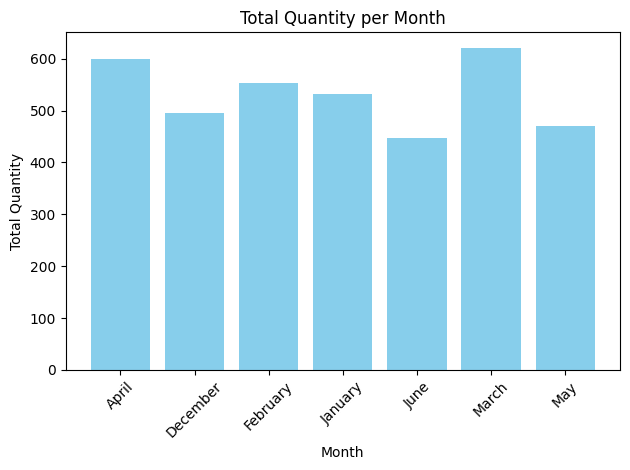

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("ProductA.csv")

data['Day Index'] = pd.to_datetime(data['Day Index'])
data['Month'] = data['Day Index'].dt.month_name()
df=data.groupby(['Month'])['Quantity'].sum().reset_index()
print(df)

plt.bar(df['Month'], df['Quantity'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

we can observe march has highest quantity and june has lowest quantity

**Correlation matrix**

In [ ]:
import pandas as pd

df = pd.read_csv('merged_file.csv')

correlation_matrix = df[['Quantity', 'Impressions', 'Clicks']].corr()

print(correlation_matrix)

             Quantity  Impressions    Clicks
Quantity     1.000000     0.135943  0.376041
Impressions  0.135943     1.000000  0.034041
Clicks       0.376041     0.034041  1.000000


**Time series analysis**

**ADF**

In [ ]:
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('merged_file.csv')

result = adfuller(data['Quantity'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.445717
p-value: 0.000246
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574


Here we can see that p-value is less than 0.05 , we will take this series as stationary

**ACF AND PACF**

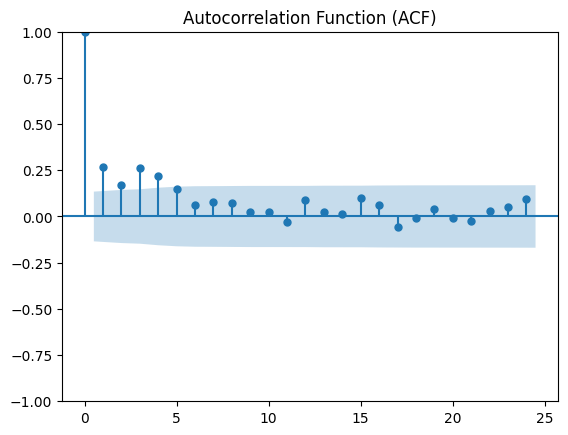

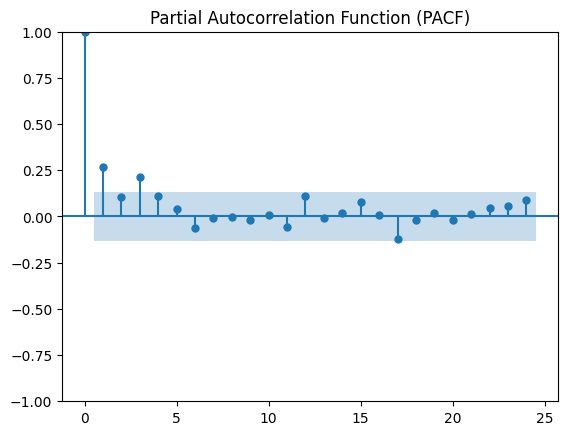

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = pd.read_csv('ProductA.csv')


data.index = pd.to_datetime(data['Day Index'])

# Plot ACF
plot_acf(data['Quantity'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(data['Quantity'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In the given ACF plot, significant spikes are seen at lags 1, 2, and 3, which then quickly decline. This suggests a possible q value of 2 or 3.

In the given PACF plot, significant spikes are also seen at lags 1, 2, and 3, followed by a rapid decline. This suggests a possible p value of 2 or 3

**AR Model**

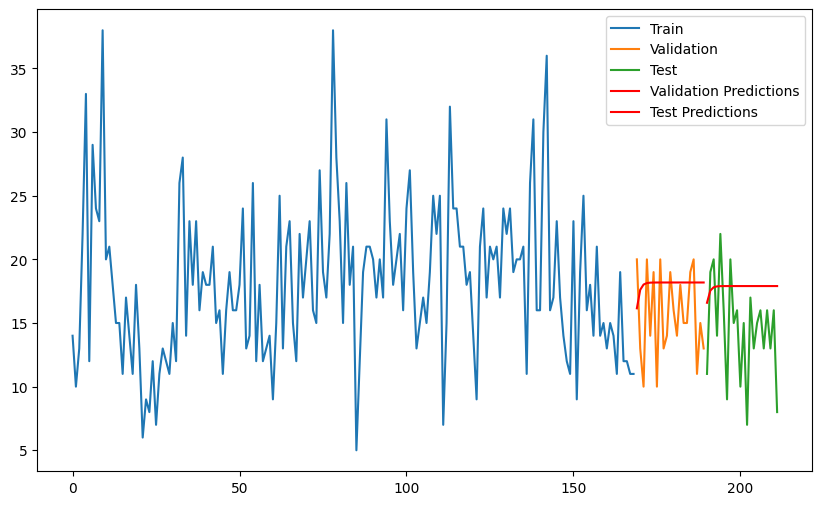

Validation Metrics : 

RMSE: 4.210821822569305
MAPE: 0.27145564260164207
R²: -0.6122433001750134
Adjusted R²: -0.7913814446389038

Test Metrics :

RMSE: 4.997142769378766
Test MAPE: 0.3725821087626428
R²: -0.6991670118172881
Adjusted R²: -0.8780266972717397


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('enhanced_file.csv')
quantity = data['Quantity']

# Split the data into train, validation, and test sets
train_size = int(len(quantity) * 0.8)
validation_size = int(len(quantity) * 0.1)
train = quantity[:train_size]
validation = quantity[train_size:train_size + validation_size]
test = quantity[train_size + validation_size:]

# Fit the AR model on the training data
model = AutoReg(train, lags=1)
model_fit = model.fit()

# Make predictions on the validation set
validation_predictions = model_fit.predict(start=len(train), end=len(train) + len(validation) - 1, dynamic=False)

# Evaluate the model on the validation set
validation_mse = np.sqrt(mean_squared_error(validation, validation_predictions))
validation_mape = mean_absolute_percentage_error(validation, validation_predictions)
validation_r2 = r2_score(validation, validation_predictions)
n_validation = len(validation)
p_validation = len(model_fit.params)
validation_adjusted_r2 = 1 - (1 - validation_r2) * ((n_validation - 1) / (n_validation - p_validation - 1))

# Update the model with training and validation data
train_validation = pd.concat([train, validation])
model = AutoReg(train_validation, lags=1)
model_fit = model.fit()

# Make predictions on the test set
test_predictions = model_fit.predict(start=len(train_validation), end=len(train_validation) + len(test) - 1, dynamic=False)

# Evaluate the model on the test set
test_mse =np.sqrt( mean_squared_error(test, test_predictions))
test_mape = mean_absolute_percentage_error(test, test_predictions)
test_r2 = r2_score(test, test_predictions)
n_test = len(test)
p_test = len(model_fit.params)
test_adjusted_r2 = 1 - (1 - test_r2) * ((n_test - 1) / (n_test - p_test - 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(validation.index, validation, label='Validation')
plt.plot(test.index, test, label='Test')
plt.plot(validation.index, validation_predictions, color='red', label='Validation Predictions')
plt.plot(test.index, test_predictions, color='red', label='Test Predictions')
plt.legend()
plt.show()

print("Validation Metrics : ")
print()
print(f'RMSE: {validation_mse}')
print(f'MAPE: {validation_mape}')
print(f'R²: {validation_r2}')
print(f'Adjusted R²: {validation_adjusted_r2}')

print()
print("Test Metrics :")
print()
print(f'RMSE: {test_mse}')
print(f'Test MAPE: {test_mape}')
print(f'R²: {test_r2}')
print(f'Adjusted R²: {test_adjusted_r2}')

**MA MODEL**

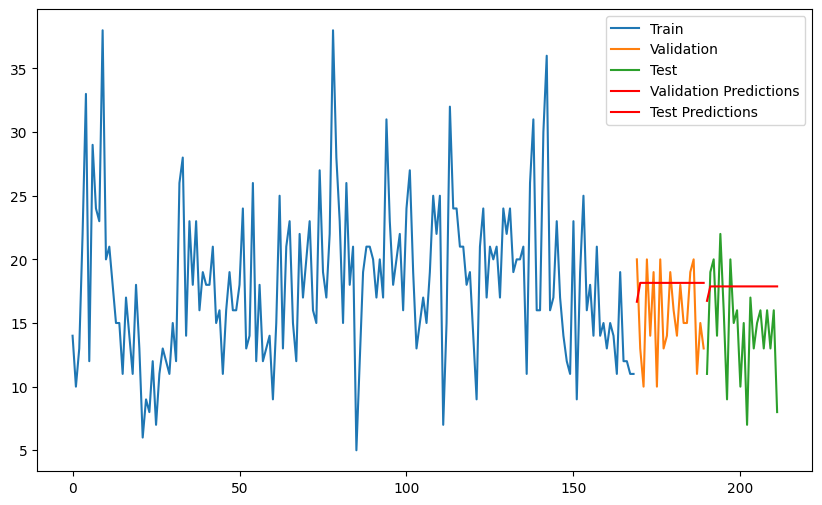

Validation Metrics : 

RMSE: 4.217311568600335
MAPE: 0.2719581993279183
R²: -0.6172167295242774
Adjusted R²: -0.9026079170873853

Test Metrics :

RMSE: 4.983283231997486
MAPE: 0.37078327758095125
R²: -0.6897548287401567
Adjusted R²: -0.9713806335301829


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the data
data = pd.read_csv('merged_file.csv')
quantity = data['Quantity']

# Split the data into train, validation, and test sets
train_size = int(len(quantity) * 0.8)
validation_size = int(len(quantity) * 0.1)
train = quantity[:train_size]
validation = quantity[train_size:train_size + validation_size]
test = quantity[train_size + validation_size:]

# Fit the MA model on the training data
model = ARIMA(train, order=(0, 0, 1))
model_fit = model.fit()

# Make predictions on the validation set
validation_predictions = model_fit.predict(start=len(train), end=len(train) + len(validation) - 1, dynamic=False)

# Evaluate the model on the validation set
validation_mse =np.sqrt( mean_squared_error(validation, validation_predictions))
validation_mape = mean_absolute_percentage_error(validation, validation_predictions)
validation_r2 = r2_score(validation, validation_predictions)
n_validation = len(validation)
p_validation = len(model_fit.params)
validation_adjusted_r2 = 1 - (1 - validation_r2) * ((n_validation - 1) / (n_validation - p_validation - 1))

# Update the model with training and validation data
train_validation = pd.concat([train, validation])
model = ARIMA(train_validation, order=(0, 0, 1))
model_fit = model.fit()

# Make predictions on the test set
test_predictions = model_fit.predict(start=len(train_validation), end=len(train_validation) + len(test) - 1, dynamic=False)

# Evaluate the model on the test set
test_mse = np.sqrt(mean_squared_error(test, test_predictions))
test_mape = mean_absolute_percentage_error(test, test_predictions)
test_r2 = r2_score(test, test_predictions)
n_test = len(test)
p_test = len(model_fit.params)
test_adjusted_r2 = 1 - (1 - test_r2) * ((n_test - 1) / (n_test - p_test - 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(validation.index, validation, label='Validation')
plt.plot(test.index, test, label='Test')
plt.plot(validation.index, validation_predictions, color='red', label='Validation Predictions')
plt.plot(test.index, test_predictions, color='red', label='Test Predictions')
plt.legend()
plt.show()

print("Validation Metrics : ")
print()
print(f'RMSE: {validation_mse}')
print(f'MAPE: {validation_mape}')
print(f'R²: {validation_r2}')
print(f'Adjusted R²: {validation_adjusted_r2}')

print()
print("Test Metrics :")
print()
print(f'RMSE: {test_mse}')
print(f'MAPE: {test_mape}')
print(f'R²: {test_r2}')
print(f'Adjusted R²: {test_adjusted_r2}')

**ARIMA MODEL**

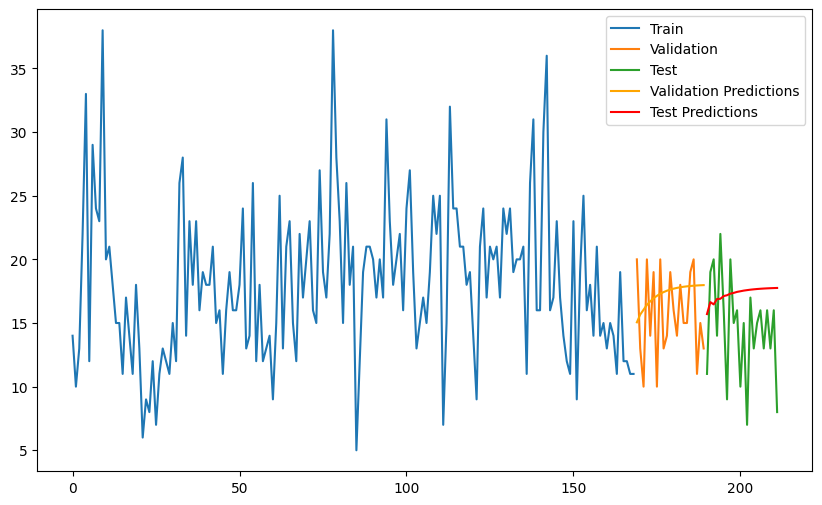

Validation Metrics : 

RMSE: 3.8133423643047712
MAPE: 0.24718012207573453
R²: -0.32223438648331193
Adjusted R²: -0.8889062664047314

Test Metrics :

RMSE: 4.814656686989878
MAPE: 0.3544959077814906
R²: -0.577332321463651
Adjusted R²: -1.2082652500491111


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the data
data = pd.read_csv('merged_file.csv')
quantity = data['Quantity']

# Split the data into train, validation, and test sets
train_size = int(len(quantity) * 0.8)
validation_size = int(len(quantity) * 0.1)
train = quantity[:train_size]
validation = quantity[train_size:train_size + validation_size]
test = quantity[train_size + validation_size:]

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Make predictions on the validation set
validation_predictions = model_fit.predict(start=len(train), end=len(train) + len(validation) - 1, dynamic=False)

# Evaluate the model on the validation set
validation_rmse = np.sqrt(mean_squared_error(validation, validation_predictions))
validation_mape = mean_absolute_percentage_error(validation, validation_predictions)
validation_r2 = r2_score(validation, validation_predictions)
n_validation = len(validation)
p_validation = len(model_fit.params)
validation_adjusted_r2 = 1 - (1 - validation_r2) * ((n_validation - 1) / (n_validation - p_validation - 1))

# Update the model with training and validation data
train_validation = pd.concat([train, validation])
model = ARIMA(train_validation, order=(2, 0, 2))
model_fit = model.fit()

# Make predictions on the test set
test_predictions = model_fit.predict(start=len(train_validation), end=len(train_validation) + len(test) - 1, dynamic=False)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(test, test_predictions))
test_mape = mean_absolute_percentage_error(test, test_predictions)
test_r2 = r2_score(test, test_predictions)
n_test = len(test)
p_test = len(model_fit.params)
test_adjusted_r2 = 1 - (1 - test_r2) * ((n_test - 1) / (n_test - p_test - 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(validation.index, validation, label='Validation')
plt.plot(test.index, test, label='Test')
plt.plot(validation.index, validation_predictions, color='orange', label='Validation Predictions')
plt.plot(test.index, test_predictions, color='red', label='Test Predictions')
plt.legend()
plt.show()

print("Validation Metrics : ")
print()
print(f'RMSE: {validation_rmse}')
print(f'MAPE: {validation_mape}')
print(f'R²: {validation_r2}')
print(f'Adjusted R²: {validation_adjusted_r2}')

print()
print("Test Metrics :")
print()
print(f'RMSE: {test_rmse}')
print(f'MAPE: {test_mape}')
print(f'R²: {test_r2}')
print(f'Adjusted R²: {test_adjusted_r2}')

 **SARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


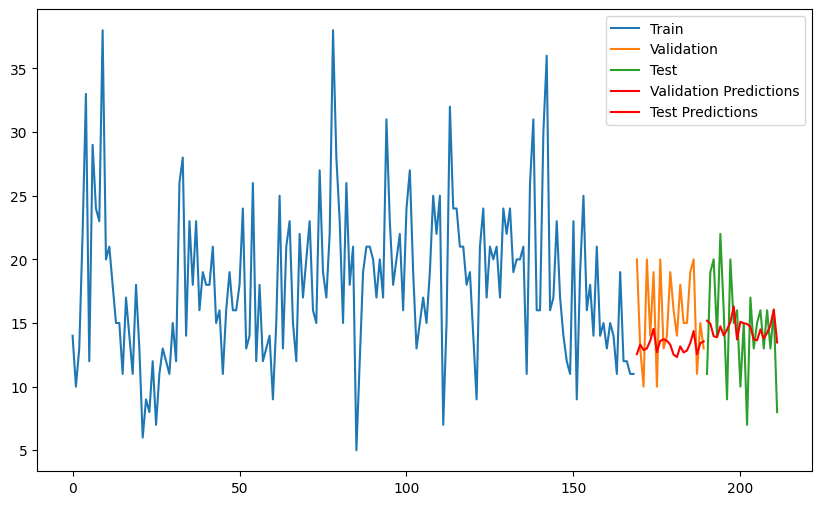

Validation Metrics :
RMSE: 3.9681697972213192
MAPE: 0.19232337213714074
R²: -0.43178347401124806
Adjusted R²: -1.202743806171151

Test Metrics :

RMSE: 3.836413553945038
MAPE: 0.24812427447453328
R²: -0.0014825495763119978
Adjusted R²: -0.3144458463189095


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


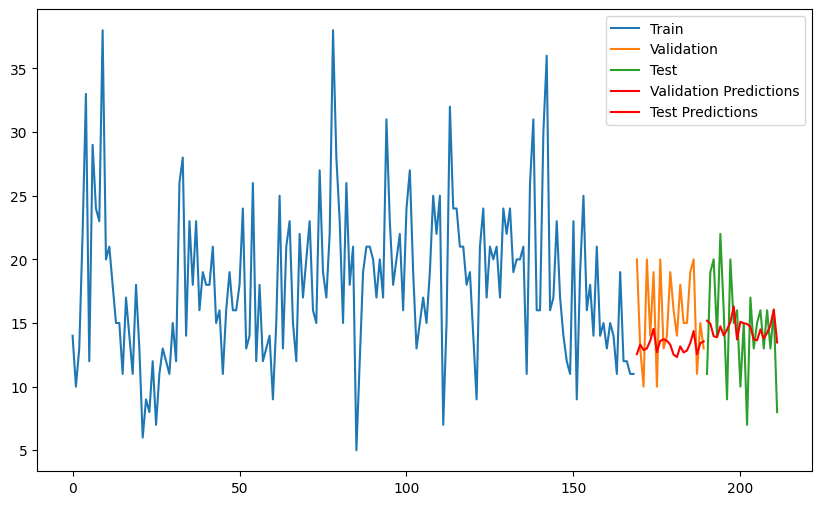

Validation Metrics :
RMSE: 3.9681697972213192
MAPE: 0.19232337213714074
R²: -0.43178347401124806
Adjusted R²: -1.202743806171151

Test Metrics :

RMSE: 3.836413553945038
MAPE: 0.24812427447453328
R²: -0.0014825495763119978
Adjusted R²: -0.3144458463189095


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the data
data = pd.read_csv('merged_file.csv')
quantity = data['Quantity']

# Split the data into train, validation, and test sets
train_size = int(len(quantity) * 0.8)
validation_size = int(len(quantity) * 0.1)
train = quantity[:train_size]
validation = quantity[train_size:train_size + validation_size]
test = quantity[train_size + validation_size:]

# Fit the SARIMA model on the training data
model = SARIMAX(train, order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions on the validation set
validation_predictions = model_fit.predict(start=len(train), end=len(train) + len(validation) - 1, dynamic=False)

# Evaluate the model on the validation set
validation_rmse = np.sqrt(mean_squared_error(validation, validation_predictions))
validation_mape = mean_absolute_percentage_error(validation, validation_predictions)
validation_r2 = r2_score(validation, validation_predictions)
n_validation = len(validation)
p_validation = len(model_fit.params)
validation_adjusted_r2 = 1 - (1 - validation_r2) * ((n_validation - 1) / (n_validation - p_validation - 1))


# Update the model with training and validation data
train_validation = pd.concat([train, validation])
model = SARIMAX(train_validation, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions on the test set
test_predictions = model_fit.predict(start=len(train_validation), end=len(train_validation) + len(test) - 1, dynamic=False)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(test, test_predictions))
test_mape = mean_absolute_percentage_error(test, test_predictions)
test_r2 = r2_score(test, test_predictions)
n_test = len(test)
p_test = len(model_fit.params)
test_adjusted_r2 = 1 - (1 - test_r2) * ((n_test - 1) / (n_test - p_test - 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(validation.index, validation, label='Validation')
plt.plot(test.index, test, label='Test')
plt.plot(validation.index, validation_predictions, color='red', label='Validation Predictions')
plt.plot(test.index, test_predictions, color='red', label='Test Predictions')
plt.legend()
plt.show()


print("Validation Metrics :")
print(f'RMSE: {validation_rmse}')
print(f'MAPE: {validation_mape}')
print(f'R²: {validation_r2}')
print(f'Adjusted R²: {validation_adjusted_r2}')

print()
print("Test Metrics :")
print()
print(f'RMSE: {test_rmse}')
print(f'MAPE: {test_mape}')
print(f'R²: {test_r2}')
print(f'Adjusted R²: {test_adjusted_r2}')

**Linear regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 3*X[:, 0] + 2*X[:, 1] + 5*X[:, 2] + np.random.randn(100)  # Target variable with noise

# Convert to a pandas DataFrame for better readability
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
data['Target'] = y

# Define the feature set and target variable
X = data[['Feature1', 'Feature2', 'Feature3']]
y = data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

# Display the first few predictions
print("\nFirst 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.values[:5])


Coefficients: [2.39134219 2.19253663 5.49726375]
Intercept: -0.2468746881577335
Mean squared error: 0.9428139454392469
R^2 score: 0.7864971108075093

First 5 predictions: [2.46965014 4.01788783 8.05229941 3.80422187 4.72362197]
First 5 actual values: [2.85774509 3.54742228 7.31730537 5.41090123 6.96902059]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = X @ np.array([3, 1, 2]) + np.random.randn(100)  # linear combination + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling, feature selection, and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(LinearRegression(), n_features_to_select=2)),
    ('regressor', LinearRegression())
])

# Define the grid of hyperparameters to search
param_grid = {
    'feature_selection__n_features_to_select': [1, 2, 3]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'MAPE: {mape:.2f}')


Best parameters: {'feature_selection__n_features_to_select': 3}
MAPE: 0.46


**Comparision table**

In [ ]:
import pandas as pd

# Data for the comparison table
data = {
    'Error Metrics / Models': ['RMSE', 'MAPE', 'R²', 'Adjusted R²'],
    'AR (Validation)': [4.2108, 0.2714, -0.61224, -0.7913],
    'MA (Validation)': [4.2173, 0.2719, -0.6172, -0.9026],
    'ARIMA (Validation)': [3.8133, 0.2471, -0.3222, -0.8889],
    'SARIMA (Validation)': [3.9681, 0.1923, -0.4317, -1.2027],
}

data2={
    'Error Metrics / Models': ['RMSE', 'MAPE', 'R²', 'Adjusted R²'],
    'AR (Test)': [4.9971, 0.3725, -0.6991, -0.8780],
    'MA (Test)': [4.9832, 0.3707, -0.6897, -0.9713],
    'ARIMA (Test)': [4.8146, 0.3544, -0.5773, -1.2082],
    'SARIMA (Test)': [3.8364, 0.2481, -0.0014, -0.3144],
}

# Create a DataFrame
comparison_df = pd.DataFrame(data)
c2=pd.DataFrame(data2)

# Save the DataFrame to an Excel file
comparison_df.to_excel('model_comparison.xlsx', index=False)
c2.to_excel('model_comparison2.xlsx', index=False)

# Display the DataFrame in a nice tabular format in the output
from IPython.display import display, HTML

display(HTML(comparison_df.to_html(index=False)))
display(HTML(c2.to_html(index=False)))


Error Metrics / Models,AR (Validation),MA (Validation),ARIMA (Validation),SARIMA (Validation)
RMSE,4.21080,4.2173,3.8133,3.9681
MAPE,0.27140,0.2719,0.2471,0.1923
R²,-0.61224,-0.6172,-0.3222,-0.4317
Adjusted R²,-0.79130,-0.9026,-0.8889,-1.2027


Error Metrics / Models,AR (Test),MA (Test),ARIMA (Test),SARIMA (Test)
RMSE,4.9971,4.9832,4.8146,3.8364
MAPE,0.3725,0.3707,0.3544,0.2481
R²,-0.6991,-0.6897,-0.5773,-0.0014
Adjusted R²,-0.8780,-0.9713,-1.2082,-0.3144
